## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

### Team 15
- Héctor Raúl Vázquez González - A00565542
- Ronald David Zuniga Sánchez - A01686240
- Sergio Omar Esparza Hernández - A01794338
- Hugo Enrique Solano Ortega - A01794456

<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project: 
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [1]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

#### Load file

First of all we import the GloVe: Global Vectors for Word Representation data set to create a dictionary, in order to visualize the pre trained vector corresponding to each word in the data set. There are four sub data sets in the Glove data set each one differentiated by the amount of dimensions(elements in each vector) to represent each word in the data set.

In [2]:
PATH = 'glove.6B.50d.txt' #Define path to load pre trained data set
emb_dim = 50

Next step is to define a function that will take the dataset and create a dictionary variable called "embeddings_dict" which will store a collection of lists where each list holds key-value pairs using the word as independent value and the list of vectors as dependent values.

In [3]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    embeddings_dict = dict() #Define empty dictionary to store words and vectors pairs
    with open(path, 'r') as file: #Open data set file as read mode
        lines = file.readlines() #Read every line in the file and save it in a variable
    for line in lines: #Loop through every line in lines
        elements = line.split() #Obtain each element separated by a space character of each line 
        embeddings_dict[elements[0]]=np.array(elements[1:], dtype = float) #Create the key-values pairs using the first element of elements which corresponds to the word

    return embeddings_dict

In [4]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH) #Run the function to create the dictionary and save it to embeddings dict variable

In [8]:
#Show the number of elements in embeddings dictionary
print(f'The number of key-values (words and punctuation marks) in the dictionary: {len(embeddings_dict)}')

The number of key-values (words and punctuation marks) in the dictionary: 400000


In [5]:
# Serialize
#Create a pkl file to save the dictionary
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

#### See some embeddings

This is a quick function to display to the user a limited amount of elements of the embeddings dictionary

In [9]:
# Show some
def show_n_first_words(path, n_words): #Function to show the values in the txt file
        with open(path, 'r') as f: #Open Glove txt file as readable file
            for i, line in enumerate(f): #Loop through the lines to show the elements in each line
                print(line.split(), len(line.split()[1:])) #Print lines splitted by space characters and the number of elements in each vector
                if i>=n_words: break #Stop to only show the number of specified elements in the function parameters

In [10]:
show_n_first_words(PATH, 5) #Run the function to show the first 5 elements

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### Plot some embeddings

In this next step we define a function to reduce the dimensionality of the vectors in order to visualize them in 2D or 3D.
This function works for PCA and for TSNE dimensionality reduction techniques which seek to reduce the quantity of elements in each vector needed to represent each word in the dictionary. 

In [11]:
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func = PCA):
    words_dict = dict()
    for element in words2show:
        words_dict[element] = embeddings_dict[element]
    pca = func(n_components=emb_dim) #Create object using the specified function and set the number of components to reduce dimensionality
    x = list(words_dict.values()) #Obtain list of embedding vectors 
    x = np.array(x) #Obtain vectors as numpy array
    y = list(words_dict.keys()) #Obtain list of words
    x_pca = pca.fit_transform(x) #Obtain the data with the dimensionality reduction applied
    plotting_points = list() #List to save the points to plot for each word
    for word in words2show: #Loop to obtain every set of points for each word
        plotting_points.append(x_pca[y.index(word)]) #Obtain the set of points by using the index method to search for the index corresponding to each word
    plotting_points = np.array(plotting_points)
    X = plotting_points[:,0]
    Y = plotting_points[:,1]
    
    n_points = len(words2show) #Obtain the number of points to plot
    colors = plt.cm.viridis(np.linspace(0,1, n_points)) #Generate different colors for each point using a colormap
    fig = plt.figure()
    if emb_dim == 3:
        Z = plotting_points[:,2]
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X, Y, Z, c=colors) #Plot a scatter using points and different colors for each point
        for i, label in enumerate(words2show):
            ax.text(X[i], Y[i], Z[i], label, fontsize=7,ha='left') #Assign labels to points
    else:
        ax = fig.add_subplot(111)
        ax.scatter(X, Y, c=colors) #Plot a scatter using points and different colors for each point
        for i, label in enumerate(words2show):
            ax.text(X[i], Y[i], label, fontsize=7,ha='left') #Assign labels to points


    plt.show()

In this section we specify the elements to apply the dimensionality reduction and that will be shown in the plot.

In [12]:

words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips', 
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


In this section we run the previous function twice to show both PCA and TSNE dimensionality reduction techniques.

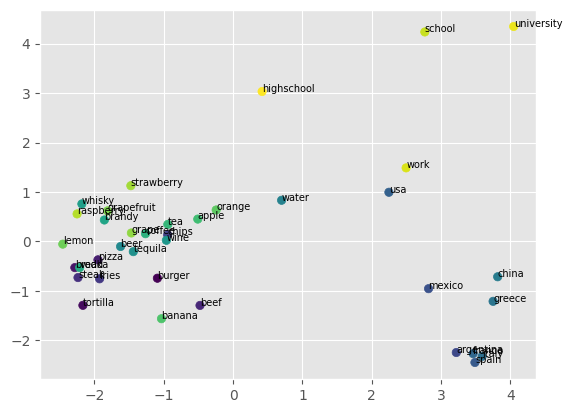

In [22]:
#Run the function to show the visualization considering PCA as dimensionality reduction technique
plot_embeddings(PATH, words, 2, embeddings_dict, PCA)

After executing the function considering PCA reduction we observed that the resultant distribution remains constant when executing the function multiple times, and even when the target dimensions are set to a different number (2-10 number of dimensions).

During code execution it was found out that TSNE takes way longer to process the full data set than PCA, reason why the amount of words to be applied the TSNE dimensionality reduction to must be limited to a specific amount of word vectors.

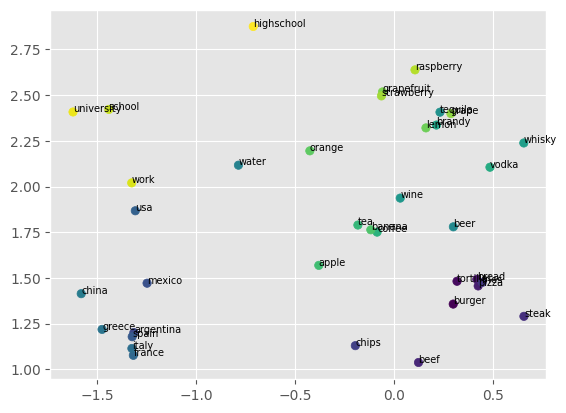

In [21]:
# t-SNE dimensionality reduction for visualization
plot_embeddings(PATH, words, 2, embeddings_dict, TSNE)

In this case, for TSNE, we observed that the distribution changes each time the function is executed, but the grouping of the words remains the same, which means and accurate reduction while preserving the relationship between words. In both visualizations we can observe that words in the same category are grouped together (countries, food, fruits, drinks and places).

### Let us compute analogies

In [23]:
# analogy
def analogy(word1, word2, word3, embeddings_dict):
    distances_list = list() #Define list to store distances
    w1_w2_w3_vector = embeddings_dict[word2]-embeddings_dict[word1] + embeddings_dict[word3] #Obtain the vector w1-w2+w3
    for vector in embeddings_dict.values(): ##Loop through all vectors stored in the embeddings dictionary
        distances_list.append(np.linalg.norm(vector-w1_w2_w3_vector)) #Obtain euclidian distances between w1-w2+w3 vector and every other vector in the dictionary
    distances_array = np.array(distances_list) #Convert list to an array in order to apply numpy functions
    ids = distances_array.argsort()[1:10] #Obtain the first indices to sort the array in ascending order, dropping the first because corresponds to the word2
    words = [list(embeddings_dict.keys())[i] for i in ids] #Obtain the corresponding words by using the indices and looking for them in dictionary keys
    print(f'The analogy is: {word1} is to {word2} as {word3} is to {words[0]}') #Print the result
    print(f'The other close relations were: {words[1:]}') #Print the other close relations

In [17]:
analogy('man', 'king', 'woman', embeddings_dict)

The analogy is: man is to king as woman is to queen
The other close relations were: ['prince', 'elizabeth', 'daughter', 'widow', 'throne', 'monarch', 'cousin', 'eldest']


In [27]:
analogy('policeman', 'crime', 'firefighter', embeddings_dict)

The analogy is: policeman is to crime as firefighter is to homelessness
The other close relations were: ['workplace', 'corporate', 'examines', 'dealing', 'lapd', 'juvenile', 'focuses', 'created']


In [30]:
analogy('sky', 'blue', 'forest', embeddings_dict)

The analogy is: sky is to blue as forest is to green
The other close relations were: ['pine', 'woodland', 'oak', 'prairie', 'tree', 'farm', 'forests', 'trees']


In [18]:
analogy('mexico', 'tequila', 'britain', embeddings_dict)

The analogy is: mexico is to tequila as britain is to guinness
The other close relations were: ['botham', 'fizzy', 'dewar', 'diageo', 'rp-1', 'cadbury', 'scotch', 'schaeffler']


In [19]:
analogy('mexico', 'tequila', 'russia', embeddings_dict)

The analogy is: mexico is to tequila as russia is to vodka
The other close relations were: ['crisco', 'maxim', 'milkshakes', 'kvass', 'lard', 'mariya', 'antimatter', 'vengerov']


In [20]:
analogy('burger', 'fries', 'bread', embeddings_dict)

The analogy is: burger is to fries as bread is to butter
The other close relations were: ['baked', 'flour', 'soup', 'toast', 'potatoes', 'cake', 'potato', 'pancakes']


By experimenting with different analogies, we observed that for certain relationships we don't obtain a consistent answer. This could be due to the amount of dimensionality used to represent each word.

In [21]:
# most similar
def find_most_similar(word, embeddings_dict, top_n=10):
    distances_list = list() #Define list to store distances
    word_vector = embeddings_dict[word] #Save the word corresponding vector
    for vector in embeddings_dict.values(): #Loop through all vectors stored in the embeddings dictionary
        distance = np.linalg.norm(vector-word_vector) #Calculate distance between vectors
        distances_list.append(distance) #Append values to distances_list
    distances_array = np.array(distances_list) #Convert list to an array
    ids = distances_array.argsort()[1:top_n+1] ##Obtain the first indices to sort the array in ascending order, dropping the first because it refers to the word we are looking for similarities
    similar_words = [list(embeddings_dict.keys())[i] for i in ids] #Obtain the corresponding words by using the indices and looking for them in dictionary keys
    return similar_words

In [22]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [23]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w}')

1 ---> venezuela
2 ---> peru
3 ---> mexican
4 ---> chile
5 ---> colombia
6 ---> puerto
7 ---> rico
8 ---> guatemala
9 ---> panama
10 ---> costa
